#  NSRDB and WTK Data Slicing

This notebook demonstrates data slicing for the National Renewable Energy Laboratory (NREL) National Solar Radiation Database (NSRDB) data. The data is provided from Amazon Web Services using the HDF Group's Highly Scalable Data Service (HSDS). These slicing methods would also work with the WIND Toolkit data available via HSDS at /nrel/wtk/

Please consult the README file for setup instructions prior to running this notebook.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.append('../bin')
from functions import HSDS

path = '/nrel/nsrdb/v3/nsrdb_2017.h5'
nsrdb = HSDS(path, preload=True)

# Extract time-series

In [2]:
# Please provide coordinates of interest (latitude, longitude)
coords = (38.885083, -77.024739)  # NREL DC office

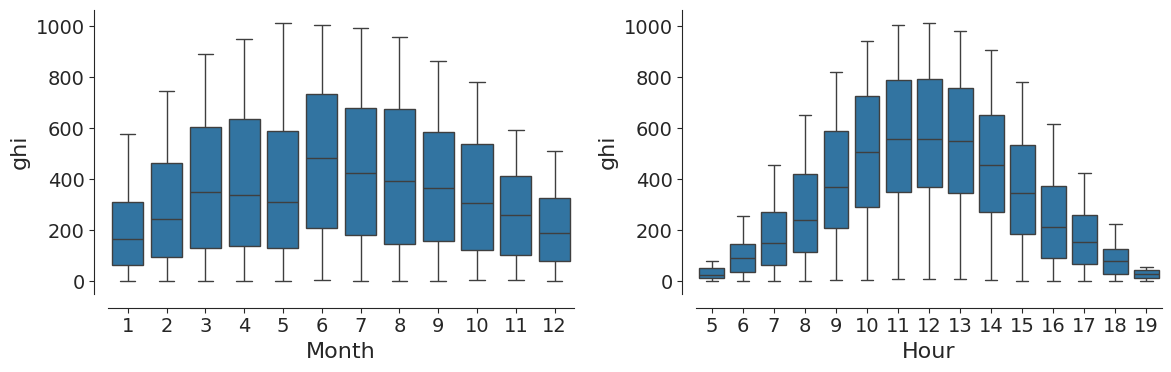

In [3]:
nsrdb_ts = nsrdb.get_timeseries('ghi', coords)
# Remove night-time
nsrdb_ts = nsrdb_ts.loc[nsrdb_ts['ghi'] != 0]
nsrdb.create_boxplots(nsrdb_ts, 'ghi')

# Extract time-step

In [4]:
# Please pick a day in 2017
datetime = '2017-06-17 18:00:00'

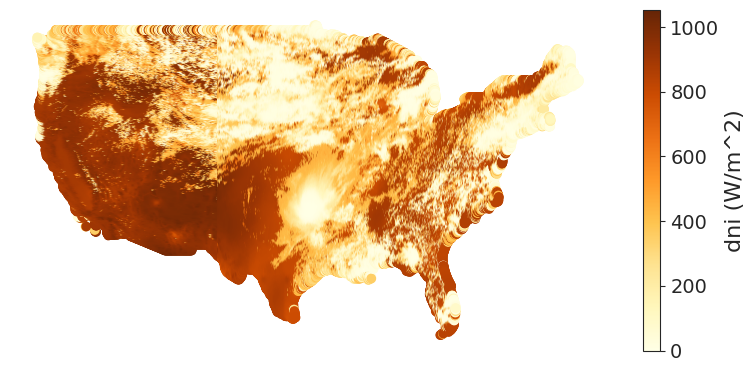

In [5]:
nsrdb_map = nsrdb.get_timestep('dni', datetime)
nsrdb.create_scatter(nsrdb_map, 'dni', cbar_label='dni (W/m^2)',
                     cmap='YlOrBr')